In [1]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.window import Window 
from pyspark.sql.functions import unix_timestamp,from_unixtime,trim,to_date,translate 
from pyspark.mllib.stat import Statistics 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc = SparkContext('local','Spark SQL')
Sqlcontext = SQLContext(sc)

In [3]:
department = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/DEPARTMENT/2790c4c4-6b48-4314-912d-20ad05b2a7a6.parquet")

In [4]:
dept_employee = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/DEPT_EMPLOYEE/6062f2bb-5746-4cff-9506-c1423e046206.parquet")

In [5]:
dept_manager = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/DEPT_MANAGER/9d69689d-1693-4a2c-997b-31d94942736e.parquet")

In [6]:
employees = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/EMPLOYEES/10670362-07fc-4469-84f0-ab82dac80c8e.parquet")

In [7]:
salaries = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/SALARIES/763b73b6-8810-4750-9980-af5108f60190.parquet")

In [8]:
titles = Sqlcontext.read.parquet("hdfs://nameservice1/user/anabig114219/parquetfinalproject/TITLES/adee0c6d-283f-4521-a9d1-1f0e14eb4220.parquet");

#### EDA

In [9]:
salaries.show(2)

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
+------+------+
only showing top 2 rows



In [11]:
salaries.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   emp_no  300024 non-null  int32
 1   salary  300024 non-null  int32
dtypes: int32(2)
memory usage: 2.3 MB


In [12]:
dept_employee.show(3)

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
+------+-------+
only showing top 3 rows



In [13]:
# Info About the Df
dept_employee.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int32 
 1   dept_no  300024 non-null  object
dtypes: int32(1), object(1)
memory usage: 3.4+ MB


In [14]:
dept_manager.show(2)

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
+-------+------+
only showing top 2 rows



In [15]:
# Info About the Df
dept_manager.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dept_no  24 non-null     object
 1   emp_no   24 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 416.0+ bytes


In [16]:
# Info About the Df
employees.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   emp_no                   300024 non-null  int32 
 1   emp_title_id             300024 non-null  object
 2   birth_date               300024 non-null  object
 3   first_name               300024 non-null  object
 4   last_name                300024 non-null  object
 5   sex                      300024 non-null  object
 6   hire_date                300024 non-null  object
 7   no_of_projects           300024 non-null  int32 
 8   Last_performance_rating  300024 non-null  object
 9   left_                    300024 non-null  object
 10  last_date                300024 non-null  object
dtypes: int32(2), object(9)
memory usage: 22.9+ MB


In [17]:
titles.show(2)

+--------+----------+
|title_id|     title|
+--------+----------+
|   e0001|Assistant |
|   e0002|  Engineer|
+--------+----------+
only showing top 2 rows



In [18]:
# Info About the Df
titles.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_id  7 non-null      object
 1   title     7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


#### Data Prepairation

In [10]:
department = department.withColumnRenamed("dept_no","dp_dept_no")
dept_employee = dept_employee.withColumnRenamed("dept_no","de_dept_no")
dept_employee = dept_employee.withColumnRenamed("emp_no","de_emp_no")
dept_manager = dept_manager.withColumnRenamed("emp_no","dm_emp_no")
dept_manager = dept_manager.withColumnRenamed("dept_no","dm_dept_no")
salaries = salaries.withColumnRenamed("emp_no",'sl_emp_no')
employees = employees.withColumnRenamed("emp_no","emp_no_s")

In [11]:
employees = employees.withColumn('birth_date',to_date('birth_date','M/d/yyyy')).withColumn('last_date',to_date('last_date','M/d/yyyy')).withColumn('hire_date',to_date('hire_date','M/d/yyyy'))

In [12]:
# Merge data frame
emp_df = employees.join(titles,employees.emp_title_id == titles.title_id,"rightouter").join(dept_employee,employees.emp_no_s == dept_employee.de_emp_no,"rightouter").join(salaries,employees.emp_no_s == salaries.sl_emp_no,"rightouter").join(department,dept_employee.de_dept_no==department.dp_dept_no,"rightouter")

##### 1. A list showing employee number, last name, first name, sex, and salary for each employee

In [13]:
emp_df.select("emp_no_s","last_name","first_name","sex","salary").show()

+--------+----------+----------+---+------+
|emp_no_s| last_name|first_name|sex|salary|
+--------+----------+----------+---+------+
|   10001|   Facello|    Georgi|  M| 60117|
|   10006|   Preusig|    Anneke|  F| 40000|
|   10008|  Kalloufi|    Saniya|  M| 46671|
|   10012| Bridgland|  Patricio|  M| 40000|
|   10014|     Genin|     Berni|  M| 46168|
|   10021|      Erde|     Ramzi|  M| 55025|
|   10022|    Famili|    Shahaf|  M| 40000|
|   10023|Montemayor|     Bojan|  F| 47883|
|   10025|    Heyers| Prasadram|  M| 40000|
|   10027|   Reistad|    Divier|  F| 40000|
|   10028|  Tempesti|  Domenick|  M| 48859|
|   10031|    Joslin|   Karsten|  M| 40000|
|   10037|  Makrucki|   Pradeep|  M| 40000|
|   10040|   Meriste|     Weiyi|  F| 52153|
|   10043|   Tzvieli|    Yishay|  M| 49324|
|   10048|  Syrotiuk|   Florian|  M| 40000|
|   10056|   Bernini|   Brendon|  F| 48857|
|   10057|  Callaway|      Ebbe|  F| 49616|
|   10062|      Peyn|    Anoosh|  M| 55685|
|   10065|     Awdeh|    Satosi|

##### 2. A list showing first name, last  name, and hire date for employees who were hired in 1986.


In [23]:
emp_df.where(year('hire_date') == 1986).select("emp_no_s","last_name","first_name","hire_date").show()

+--------+------------+----------+----------+
|emp_no_s|   last_name|first_name| hire_date|
+--------+------------+----------+----------+
|   10001|     Facello|    Georgi|1986-06-26|
|   10003|     Bamford|     Parto|1986-08-28|
|   10004|     Koblick| Chirstian|1986-12-01|
|   10053|    Zschoche|    Sanjiv|1986-02-04|
|   10066|    Schusler|      Kwee|1986-02-26|
|   10079|        Gils|   Kshitij|1986-03-27|
|   10081|       Rosen|  Zhongwei|1986-10-30|
|   10087|     Eugenio|   Xinglin|1986-09-08|
|   10089|Flasterstein| Sudharsan|1986-08-12|
|   10090|     Hofting|    Kendra|1986-03-14|
|   10095|      Morton|    Hilari|1986-07-15|
|   10103|       Birch|     Akemi|1986-12-02|
|   10108|      Giveon|    Lunjin|1986-10-02|
|   10110|      Ullian|    Xuejia|1986-08-22|
|   10115|    Rissland|   Chikara|1986-01-23|
|   10119|    Peltason|  Domenick|1986-03-14|
|   10136|    Pintelas|    Zissis|1986-02-11|
|   10138|   Shimshoni|     Perry|1986-09-18|
|   10147| Encarnacion|  Kazuhito|

In [24]:
emp_df.columns

['emp_no_s',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'Last_performance_rating',
 'left_',
 'last_date',
 'title_id',
 'title',
 'de_emp_no',
 'de_dept_no',
 'sl_emp_no',
 'salary',
 'dp_dept_no',
 'dept_name']

##### 2. A list showing the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name

In [25]:
department.join(dept_manager,department.dp_dept_no == dept_manager.dm_dept_no,"rightouter").join(employees,dept_manager.dm_emp_no == employees.emp_no_s,"inner").select("dm_dept_no","dept_name","emp_no_s","last_name","first_name").show()

+----------+------------------+--------+------------+-----------+
|dm_dept_no|         dept_name|emp_no_s|   last_name| first_name|
+----------+------------------+--------+------------+-----------+
|      d001|         Marketing|  110022|  Markovitch|  Margareta|
|      d001|         Marketing|  110039|    Minakawa|   Vishwani|
|      d002|           Finance|  110085|       Alpin|       Ebru|
|      d002|           Finance|  110114|  Legleitner|      Isamu|
|      d003|   Human Resources|  110183|Ossenbruggen|    Shirish|
|      d003|   Human Resources|  110228|     Sigstam|    Karsten|
|      d004|        Production|  110303|     Wegerle|  Krassimir|
|      d004|        Production|  110344|       Cools|     Rosine|
|      d004|        Production|  110386|      Kieras|       Shem|
|      d004|        Production|  110420|    Ghazalie|      Oscar|
|      d005|       development|  110511|    Hagimont|   DeForest|
|      d005|       development|  110567|    DasSarma|       Leon|
|      d00

##### 3. A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

In [26]:
department.join(dept_employee,department.dp_dept_no == dept_employee.de_dept_no,"rightouter").join(employees,dept_employee.de_emp_no == employees.emp_no_s,"inner").select("emp_no_s","last_name","first_name","dept_name").show()

+--------+-----------+----------+------------------+
|emp_no_s|  last_name|first_name|         dept_name|
+--------+-----------+----------+------------------+
|   10001|    Facello|    Georgi|       development|
|   10002|     Simmel|   Bezalel|             Sales|
|   10003|    Bamford|     Parto|        Production|
|   10004|    Koblick| Chirstian|        Production|
|   10005|   Maliniak|   Kyoichi|   Human Resources|
|   10006|    Preusig|    Anneke|       development|
|   10007|  Zielinski|   Tzvetan|          Research|
|   10008|   Kalloufi|    Saniya|       development|
|   10009|       Peac|    Sumant|Quality Management|
|   10010|   Piveteau| Duangkaew|        Production|
|   10011|      Sluis|      Mary|  Customer Service|
|   10012|  Bridgland|  Patricio|       development|
|   10013|     Terkki| Eberhardt|   Human Resources|
|   10014|      Genin|     Berni|       development|
|   10015|  Nooteboom|  Guoxiang|          Research|
|   10016|Cappelletti|  Kazuhito|             

##### 4. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [27]:
employees.where((employees.first_name == "Hercules") & (employees.last_name.startswith("B"))).show()

+--------+------------+----------+----------+-------------+---+----------+--------------+-----------------------+-----+----------+
|emp_no_s|emp_title_id|birth_date|first_name|    last_name|sex| hire_date|no_of_projects|Last_performance_rating|left_| last_date|
+--------+------------+----------+----------+-------------+---+----------+--------------+-----------------------+-----+----------+
|   10282|       e0002|1953-11-27|  Hercules|   Benzmuller|  M|1986-06-04|             8|                      A|    0|      null|
|   11337|       s0001|1964-07-31|  Hercules|      Brendel|  F|1994-11-20|             6|                      A|    0|      null|
|   20780|       s0001|1954-11-17|  Hercules|   Baranowski|  M|1991-03-09|             6|                      A|    1|2000-11-26|
|   21870|       e0003|1960-07-06|  Hercules|     Barreiro|  M|1988-11-18|            10|                      A|    0|      null|
|   38161|       s0001|1964-10-12|  Hercules|         Baer|  M|1988-02-17|         

##### 5. A list showing all employees in the Sales department, including their employee number, last name, first name, anddepartment name.


In [28]:
emp_df.where(emp_df.dept_name == 'Sales').select('emp_no_s','last_name','first_name','dept_name').show()

+--------+------------+----------+---------+
|emp_no_s|   last_name|first_name|dept_name|
+--------+------------+----------+---------+
|   10002|      Simmel|   Bezalel|    Sales|
|   10016| Cappelletti|  Kazuhito|    Sales|
|   10034|        Swan|     Bader|    Sales|
|   10041|      Lenart|       Uri|    Sales|
|   10053|    Zschoche|    Sanjiv|    Sales|
|   10060| Billingsley|  Breannda|    Sales|
|   10061|      Herber|       Tse|    Sales|
|   10068|     Brattka|  Charlene|    Sales|
|   10087|     Eugenio|   Xinglin|    Sales|
|   10088|    Syrzycki|  Jungsoon|    Sales|
|   10089|Flasterstein| Sudharsan|    Sales|
|   10093|     Desikan|   Sailaja|    Sales|
|   10095|      Morton|    Hilari|    Sales|
|   10099|     Sullins|    Valter|    Sales|
|   10101|      Heyers|     Perla|    Sales|
|   10107|        Baca|      Dung|    Sales|
|   10125|     Hiltgen|     Syozo|    Sales|
|   10136|    Pintelas|    Zissis|    Sales|
|   10148|       Azumi|    Douadi|    Sales|
|   10149|

##### 6. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name

In [29]:
emp_df.where((emp_df.dept_name == 'Sales') | (emp_df.dept_name == 'Development')).select('emp_no_s','last_name','first_name','dept_name').show()

+--------+------------+----------+---------+
|emp_no_s|   last_name|first_name|dept_name|
+--------+------------+----------+---------+
|   10002|      Simmel|   Bezalel|    Sales|
|   10016| Cappelletti|  Kazuhito|    Sales|
|   10034|        Swan|     Bader|    Sales|
|   10041|      Lenart|       Uri|    Sales|
|   10053|    Zschoche|    Sanjiv|    Sales|
|   10060| Billingsley|  Breannda|    Sales|
|   10061|      Herber|       Tse|    Sales|
|   10068|     Brattka|  Charlene|    Sales|
|   10087|     Eugenio|   Xinglin|    Sales|
|   10088|    Syrzycki|  Jungsoon|    Sales|
|   10089|Flasterstein| Sudharsan|    Sales|
|   10093|     Desikan|   Sailaja|    Sales|
|   10095|      Morton|    Hilari|    Sales|
|   10099|     Sullins|    Valter|    Sales|
|   10101|      Heyers|     Perla|    Sales|
|   10107|        Baca|      Dung|    Sales|
|   10125|     Hiltgen|     Syozo|    Sales|
|   10136|    Pintelas|    Zissis|    Sales|
|   10148|       Azumi|    Douadi|    Sales|
|   10149|

##### 7. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

In [14]:
emp_df.sort(emp_df.last_name.desc()).groupBy('last_name').count().show()

+---------+-----+
|last_name|count|
+---------+-----+
|  dAstous|  166|
|     Zykh|  148|
|     Zyda|  181|
|  Zwicker|  176|
|  Zweizig|  180|
|  Zumaque|  195|
|  Zultner|  177|
|   Zucker|  185|
|  Zuberek|  209|
| Zschoche|  165|
|  Zongker|  192|
| Zolotykh|  183|
|  Zockler|  173|
|    Zobel|  162|
|   Zlotek|  182|
|    Zizka|  180|
|Zirintsis|  188|
|Zielinski|  172|
|   Zhiwei|  177|
|    Zhang|  163|
+---------+-----+
only showing top 20 rows



In [15]:
emp_pd_df = emp_df.select('emp_no_s','sex','no_of_projects','Last_performance_rating','left_','title','de_dept_no',
                          'salary','dept_name').toPandas()

##### 8. Histogram to show the salary distribution among the employees

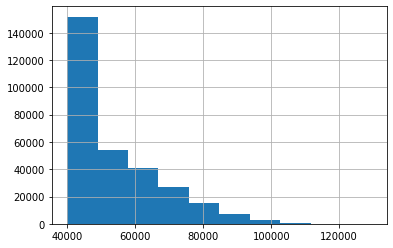

In [16]:
emp_pd_df.salary.hist(bins = 10)

##### 9. Bar graph to show the Average salary per title (designation)


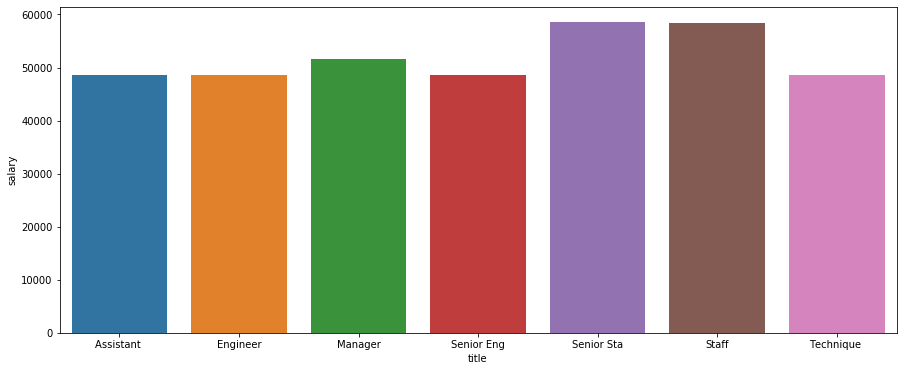

In [33]:
data_table = emp_pd_df.pivot_table(index='title',values = 'salary',aggfunc= 'mean').reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data = data_table,x='title',y='salary')
plt.show()

##### 10. Calculate employee tenure & show the tenure distribution among the employees

In [34]:
emp_df.createTempView("emp_tbl")

In [35]:
Sqlcontext.sql("""select emp_no_s,hire_date,last_date, case when last_date is null then 2000 - year(hire_date) else  year(last_date)-year(hire_date) end as Tenure from emp_tbl""").show()

+--------+----------+----------+------+
|emp_no_s| hire_date| last_date|Tenure|
+--------+----------+----------+------+
|   10001|1986-06-26|1994-07-30|     8|
|   10006|1989-06-02|      null|    11|
|   10008|1994-09-15|      null|     6|
|   10012|1992-12-18|      null|     8|
|   10014|1987-03-11|      null|    13|
|   10021|1988-02-10|      null|    12|
|   10022|1995-08-22|2005-11-04|    10|
|   10023|1989-12-17|      null|    11|
|   10025|1987-08-17|      null|    13|
|   10027|1989-07-07|      null|    11|
|   10028|1991-10-22|      null|     9|
|   10031|1991-09-01|1999-08-03|     8|
|   10037|1990-12-05|      null|    10|
|   10040|1993-02-14|      null|     7|
|   10043|1990-10-20|      null|    10|
|   10048|1985-02-24|      null|    15|
|   10056|1990-02-01|      null|    10|
|   10057|1992-01-15|      null|     8|
|   10062|1991-08-30|1993-02-16|     2|
|   10065|1988-05-18|      null|    12|
+--------+----------+----------+------+
only showing top 20 rows



#### Own Analysis

##### 1. Percentage distribution of employees as per the Designation

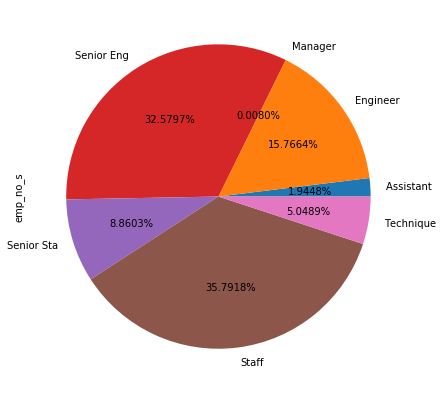

In [36]:
emp_pd_df.groupby('title')['emp_no_s'].agg('count').plot(kind='pie',subplots=True,figsize=(12,7),autopct = '%1.4f%%')
plt.show()

##### Department wise manager count

##### 2. Department wise employee count

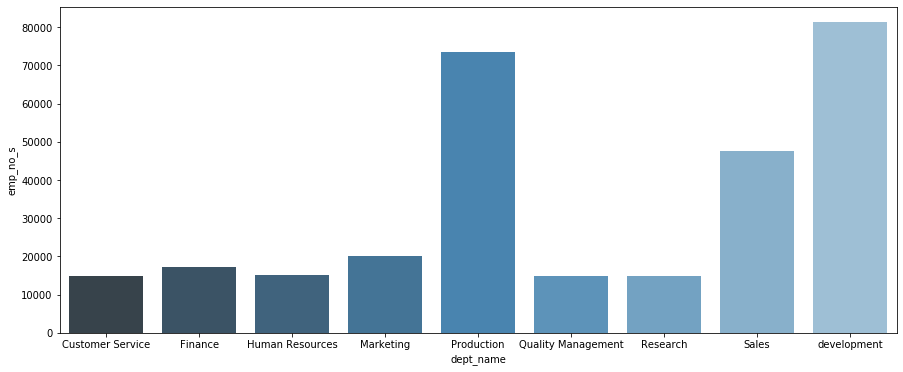

In [37]:
data_table = emp_pd_df.pivot_table(index='dept_name',values = 'emp_no_s',aggfunc= 'count').reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data = data_table,x='dept_name',y='emp_no_s',palette="Blues_d")
plt.show()

##### 3. Gender wise employee count for different deepartments

Text(0, 0.5, 'Employee Count')

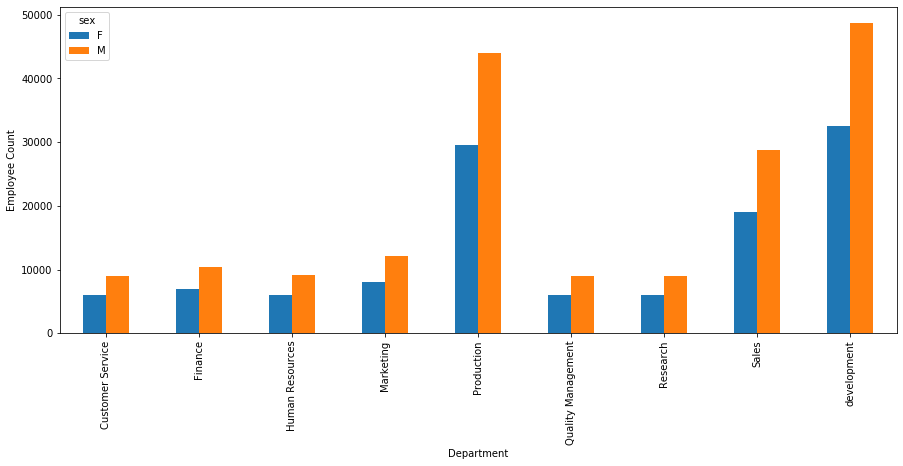

In [38]:
output1 = emp_pd_df.pivot_table(index='dept_name', columns='sex', values='emp_no_s', aggfunc='count')
output1.plot(kind='bar',figsize=(15,6))
plt.xlabel("Department")
plt.ylabel("Employee Count")

##### 4. Max, min, avg of salaries

In [39]:
emp_df.select(max('salary').alias('Max Salary'),min('salary').alias('Min Salary'),mean('salary').alias('Average Salary')).show()

+----------+----------+------------------+
|Max Salary|Min Salary|    Average Salary|
+----------+----------+------------------+
|    129492|     40000|52970.732451403885|
+----------+----------+------------------+



##### 5. Department wise Left and working employee

[0 : Current Employee] [1 : Left Employee]


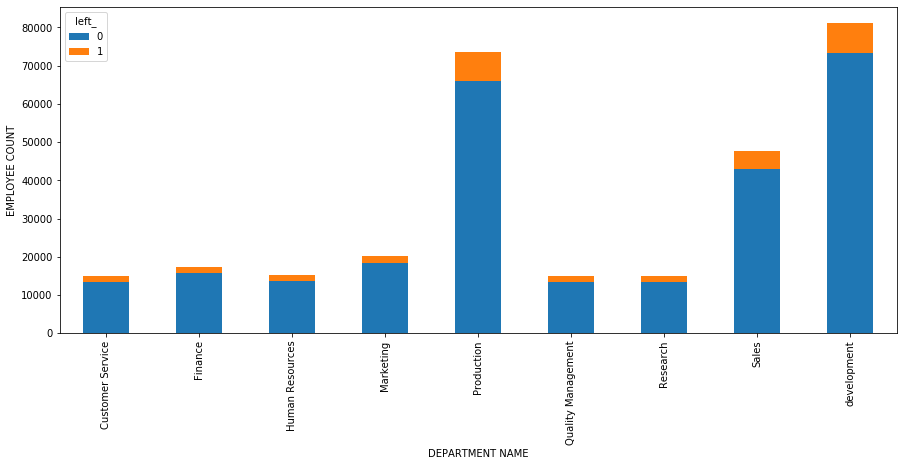

In [20]:
print("[0 : Current Employee] [1 : Left Employee]")
emp_pd_df.pivot_table(index='dept_name',columns='left_',values = 'emp_no_s',aggfunc= 'count').plot(kind='bar',figsize=(15,6),stacked=True)
plt.ylabel('EMPLOYEE COUNT')
plt.xlabel('DEPARTMENT NAME')
plt.show()

##### Analyse working vs left employes from different designations

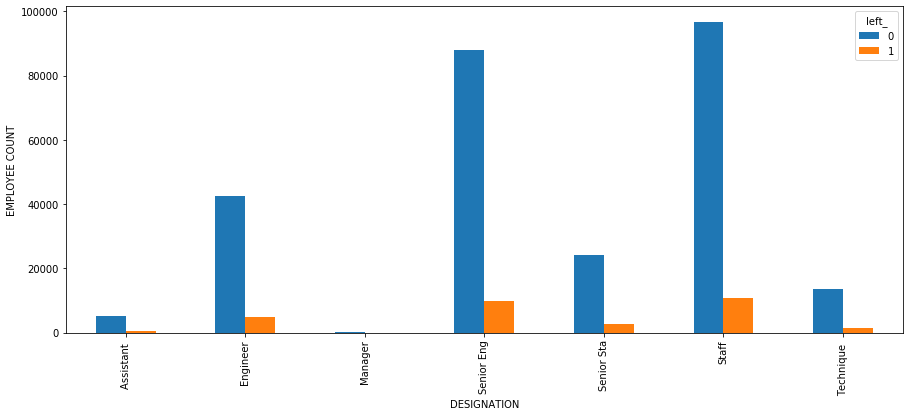

In [41]:
emp_pd_df.pivot_table(index='title',columns='left_',values = 'emp_no_s',aggfunc= 'count').plot(kind='bar',figsize=(15,6))
plt.ylabel('EMPLOYEE COUNT')
plt.xlabel('DESIGNATION')
plt.show()

##### Average salary designation wise

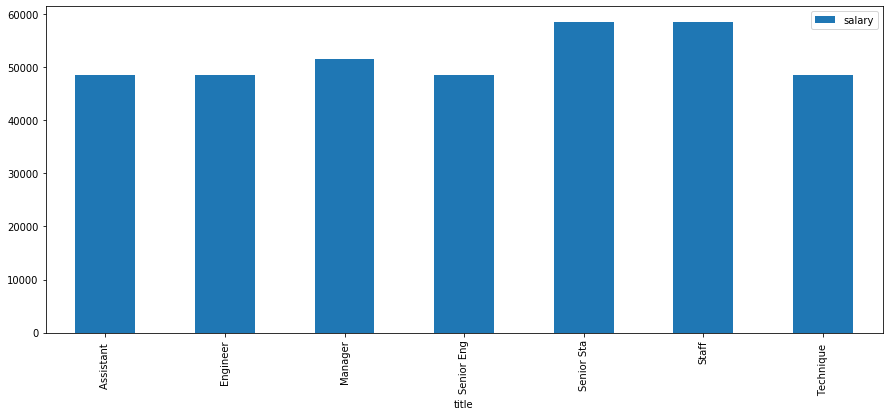

In [23]:
emp_pd_df.pivot_table(index ='title',values ='salary',aggfunc = 'mean').plot(kind='bar',figsize=(15,6))

##### Department wise number of projects

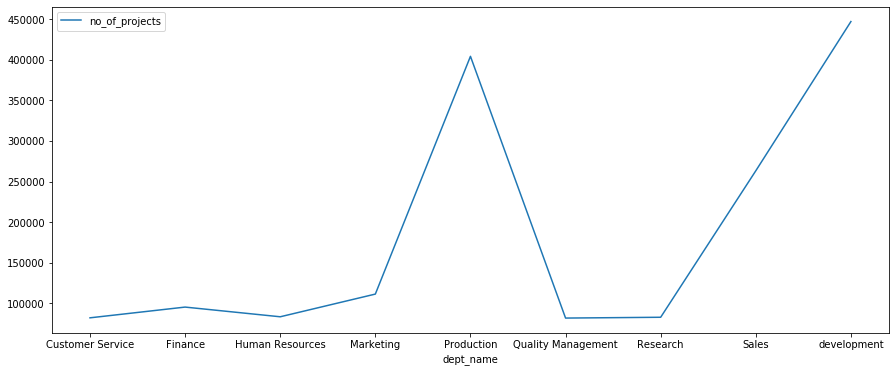

In [17]:
emp_pd_df.pivot_table(index='dept_name',values = 'no_of_projects',aggfunc= 'sum').plot(kind='line',figsize=(15,6))
plt.show()

### ML

### Feature Engineering

In [ ]:
#SELECT FEW COLUMNS FOR MY MODEL
emp_df_final = emp_df.select('de_dept_no','sex','salary','no_of_projects','left_','birth_date')

In [ ]:
# Create a new column called "age" to calculate the age of employees
emp_df_final = emp_df_final.withColumn('age',2000-year('birth_date'))

In [ ]:
emp_df_final = emp_df_final.drop("birth_date")

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer,OneHotEncoderEstimator

In [ ]:
#Columns that will be used as features and their types
continuous_features = ['salary', 'no_of_projects','age']

categorical_features = ['de_dept_no', 'sex']

In [ ]:
# create object of StringIndexer class and specify input and output column
SI_de_dept = StringIndexer(inputCol='de_dept_no',outputCol='de_dept_Index')
SI_sex = StringIndexer(inputCol='sex',outputCol='sex_Index')


# transform the data
emp_df_final = SI_de_dept.fit(emp_df_final).transform(emp_df_final)
emp_df_final = SI_sex.fit(emp_df_final).transform(emp_df_final)

# view and transform the data
emp_df_final.show(2)

In [ ]:
# create object and specify input and output column
OHE = OneHotEncoderEstimator(inputCols=['de_dept_Index', 'sex_Index'],outputCols=['de_dept_Ohe', 'sex_Ohe'])
# transform the data
emp_df_final = OHE.fit(emp_df_final).transform(emp_df_final)

# view and transform the data
emp_df_final.show(2)

### `Preparing for model building
- The dataframe need to have two columns: features and label
- The vector columns need to named as features
- The target variable need to be named as label
- Then the dataframe can be directly fed to a model to learn

In [ ]:
featurecols = continuous_features + ['de_dept_Ohe', 'sex_Ohe']

In [ ]:
# Feature Column
assembler = VectorAssembler(inputCols=featurecols,outputCol="features")

emp_df_final = assembler.transform(emp_df_final)

In [ ]:
#Label Column

emp_df_final = emp_df_final.withColumnRenamed("left_",'label')
emp_df_final = emp_df_final.withColumn("label",emp_df_final.label.cast('int'))

In [ ]:
# Train and Test data
train_df,test_df = emp_df_final.randomSplit( [0.7, 0.3], seed = 42 )

In [ ]:
#Build the Linear Regression Model
from pyspark.ml.classification import LogisticRegression 

In [ ]:
logrg = LogisticRegression(featuresCol= 'features',labelCol='label',maxIter=5)

In [ ]:
lr = logrg.fit(train_df)

In [ ]:
lr.intercept

In [ ]:
lr.coefficients

In [ ]:
y_pred_test = lr.transform(test_df)

In [ ]:
y_pred_train = lr.transform(train_df)

In [ ]:
y_pred_train.select('features','label','rawPrediction','probability','prediction').toPandas().head()

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluator = BinaryClassificationEvaluator()

In [ ]:
evaluator.evaluate(y_pred_test)

### Accuracy

In [ ]:
y_pred_test.filter(y_pred_test.label == y_pred_test.prediction).count() / float(y_pred_test.count())

### PipeLine

In [ ]:
#Columns that will be used as features and their types
continuous_features = ['salary', 'no_of_projects','age']

categorical_features = ['de_dept_no', 'sex']

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

## Create indexers for the categorical features
indexers = [StringIndexer(inputCol=c, outputCol="{}_idx".format(c)) for c in categorical_features]

## encode the categorical features
encoders = [ OneHotEncoder(
      inputCols=idx.getOutputCol(),
      outputCols="{0}_enc".format(idx.getOutputCol())) for idx in indexers]

## Create vectors for all features categorical and continuous

assembler = VectorAssembler(
  inputCols=[enc.getOutputCol() for enc in encoders] + continuous_features,
  outputCol="features")

## Initialize the linear model
lrModel = LinearRegression( maxIter = 10 )


## Create the pipeline with sequence of activities
#pipeline = Pipeline( stages=indexers + encoders + [assembler, lrModel ])

pipeline = Pipeline( stages= [indexers, encoders, assembler, lrModel ])

In [ ]:
#Label Column
emp_df_final = emp_df_final.withColumnRenamed("left_",'label')
emp_df_final = emp_df_final.withColumn("label",emp_df_final.label.cast('int'))

In [ ]:
training, testing = housing_pipeline_df.randomSplit( [0.7, 0.3], seed = 42 )

In [ ]:
model = pipeline.fit( training )

In [ ]:
y_pred_train = model.transform(training)